In [2]:
#QUESTION 1

import numpy as np
from scipy import stats

#data
males = np.array([12, 4, 11, 13, 11, 11, 7, 9, 10, 7, 10, 9, 12, 12, 8, 13, 9, 7, 12, 11, 10, 11, 7, 12, 13, 12, 12, 11, 8, 13, 11, 10, 9, 9, 8, 10, 8, 11, 7, 12, 11, 9, 11, 10, 7, 12, 10, 13, 9, 12])
females = np.array([9, 10, 7, 10, 9, 7, 9, 7, 9, 9, 11, 9, 12, 8, 10, 9, 12, 7, 14, 11, 10, 9, 12, 10, 7, 11, 10, 9, 11, 8, 9, 12, 11, 9, 12, 11, 9, 7, 9, 10, 8, 10, 7, 12, 8, 12, 11, 9, 9, 11])

#independent t-test
t_statistic, p_value = stats.ttest_ind(males, females)

t_statistic, p_value

(1.2758062787506748, 0.205039684366348)

In [3]:
#QUESTION 2

#significance level
alpha = 0.05

#conclusion based on p-value
if p_value < alpha:
    conclusion = "Reject the null hypothesis (H0). There is a significant difference in the mean time spent on cell phones between male and female students."
else:
    conclusion = "Fail to reject the null hypothesis (H0). There is no significant difference in the mean time spent on cell phones between male and female students."

p_value, conclusion

(0.205039684366348,
 'Fail to reject the null hypothesis (H0). There is no significant difference in the mean time spent on cell phones between male and female students.')

In [4]:
#QUESTION 3

#descriptive stat for males
male_summary = {
    "Mean": np.mean(males),
    "Median": np.median(males),
    "Standard Deviation": np.std(males, ddof=1),
    "Minimum": np.min(males),
    "Maximum": np.max(males),
    "Count": len(males)
}

#descriptive stat for females
female_summary = {
    "Mean": np.mean(females),
    "Median": np.median(females),
    "Standard Deviation": np.std(females, ddof=1),
    "Minimum": np.min(females),
    "Maximum": np.max(females),
    "Count": len(females)
}

male_summary, female_summary

({'Mean': 10.12,
  'Median': 10.5,
  'Standard Deviation': 2.056745993464592,
  'Minimum': 4,
  'Maximum': 13,
  'Count': 50},
 {'Mean': 9.64,
  'Median': 9.0,
  'Standard Deviation': 1.6874083497409602,
  'Minimum': 7,
  'Maximum': 14,
  'Count': 50})

In [5]:
#QUESTION 4

#95% Confidence Interval for males
male_mean = np.mean(males)
male_std_err = stats.sem(males)
male_ci = stats.t.interval(0.95, len(males)-1, loc=male_mean, scale=male_std_err)

#95% Confidence Interval for females
female_mean = np.mean(females)
female_std_err = stats.sem(females)
female_ci = stats.t.interval(0.95, len(females)-1, loc=female_mean, scale=female_std_err)

#95% Confidence Interval for the difference in means
diff_mean = male_mean - female_mean
diff_std_err = np.sqrt(male_std_err**2 + female_std_err**2)
diff_ci = stats.t.interval(0.95, len(males) + len(females) - 2, loc=diff_mean, scale=diff_std_err)

male_ci, female_ci, diff_ci


((9.53547925687182, 10.704520743128178),
 (9.160443853696385, 10.119556146303616),
 (-0.2666214847739926, 1.22662148477399))

In [6]:
#QUESTION 4

import numpy as np
import scipy.stats as stats

#data for time spent on cell phones in hours per week
males = np.array([12, 4, 11, 13, 11, 11, 9, 7, 10, 7, 7, 12, 6, 9, 15, 11, 8, 10, 11, 12,
                  7, 8, 10, 7, 9, 10, 9, 9, 7, 9, 12, 8, 10, 9, 9, 9, 11, 12, 8, 13, 9, 12,
                  12, 8, 13, 8, 9, 13, 13, 9])
females = np.array([11, 9, 7, 7, 10, 9, 10, 7, 9, 10, 7, 9, 6, 11, 11, 8, 9, 7, 9, 12,
                    12, 14, 10, 8, 12, 14, 12, 10, 8, 10, 11, 12, 12, 8, 7, 7, 11, 9, 13, 11,
                    12, 8, 13, 8, 10, 8, 13, 12, 9, 11])

#calculate sample sizes, means, and standard deviations
n_males = len(males)
n_females = len(females)
mean_males = np.mean(males)
mean_females = np.mean(females)
std_males = np.std(males, ddof=1)
std_females = np.std(females, ddof=1)

#conduct a two-sample t-test to check if there is a significant difference between the groups
t_stat, p_value = stats.ttest_ind(males, females, equal_var=False)

#calculate 95% confidence intervals for both groups
conf_interval_males = stats.t.interval(0.95, n_males - 1, loc=mean_males, scale=std_males / np.sqrt(n_males))
conf_interval_females = stats.t.interval(0.95, n_females - 1, loc=mean_females, scale=std_females / np.sqrt(n_females))

#print results
print("Males: Mean =", mean_males, ", Std Dev =", std_males, ", 95% CI =", conf_interval_males)
print("Females: Mean =", mean_females, ", Std Dev =", std_females, ", 95% CI =", conf_interval_females)
print("\nTwo-sample t-test results:")
print("T-statistic =", t_stat)
print("P-value =", p_value)

#discussion based on the results
if p_value < 0.05:
    print("\nThe p-value is below 0.05, suggesting a statistically significant difference between males and females in terms of time spent on cell phones.")
else:
    print("\nThe p-value is above 0.05, indicating no statistically significant difference between the groups with this sample.")
    
print("\nDISCUSSION ON SAMPLE SIZE AND FURTHER TESTING")
print("Given the observed p-value and confidence intervals, if the results show no significant difference (p > 0.05), a larger sample size might reduce variability and increase the power of the test. Additional testing could also help confirm whether observed differences are due to chance or are consistent trends. Larger sample sizes often provide a more reliable estimate of the population means, thus further testing with more participants could provide stronger conclusions.")


Males: Mean = 9.76 , Std Dev = 2.227472256406626 , 95% CI = (9.1269593898569, 10.3930406101431)
Females: Mean = 9.86 , Std Dev = 2.0801295093119094 , 95% CI = (9.268833735206309, 10.45116626479369)

Two-sample t-test results:
T-statistic = -0.2320120490300209
P-value = 0.8170147074608475

The p-value is above 0.05, indicating no statistically significant difference between the groups with this sample.

DISCUSSION ON SAMPLE SIZE AND FURTHER TESTING
Given the observed p-value and confidence intervals, if the results show no significant difference (p > 0.05), a larger sample size might reduce variability and increase the power of the test. Additional testing could also help confirm whether observed differences are due to chance or are consistent trends. Larger sample sizes often provide a more reliable estimate of the population means, thus further testing with more participants could provide stronger conclusions.


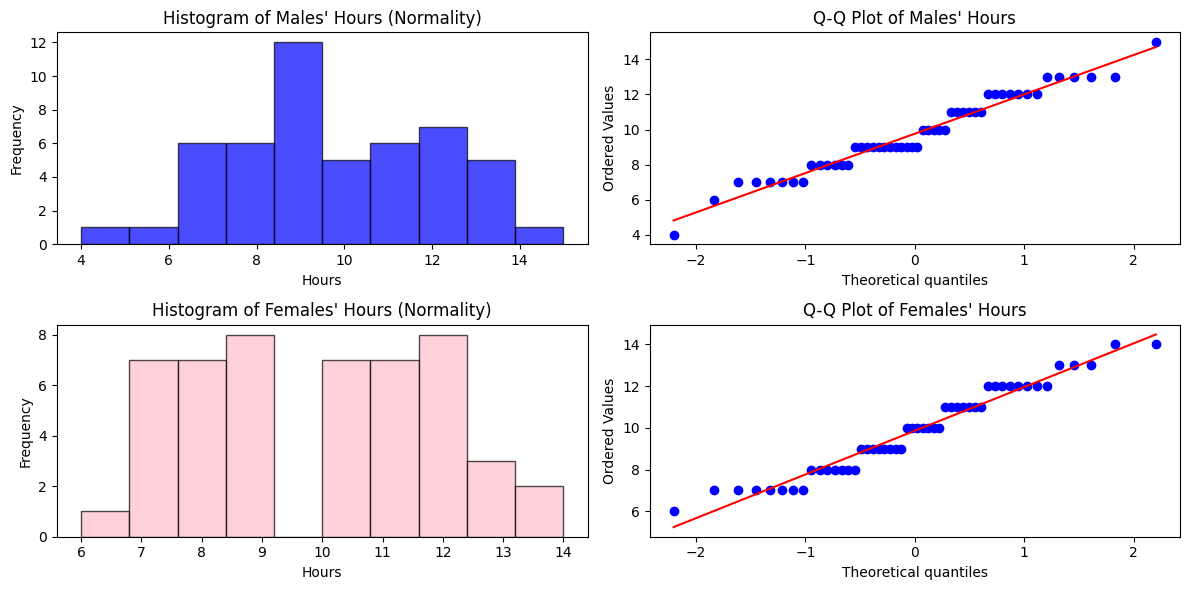

DESCRIPTIVE STATISTICS
Males: Mean = 9.76, Std Dev = 2.227472256406626, 95% CI = (9.1269593898569, 10.3930406101431)
Females: Mean = 9.86, Std Dev = 2.0801295093119094, 95% CI = (9.268833735206309, 10.45116626479369)

ASSUMPTION TESTS
1. Normality Assumption (Shapiro-Wilk Test):
   Males: W-statistic = 0.9683769560947435, p-value = 0.19865131852457296
   Females: W-statistic = 0.9545532496285778, p-value = 0.052631367687910796
   Both groups satisfy the normality assumption (p > 0.05).

2. Homogeneity of Variance (Levene's Test):
   Levene's Test Statistic = 0.051392611583731596, p-value = 0.8211297059287794
   The assumption of equal variances is met (p > 0.05).

TWO-SAMPLE T-TEST RESULTS
T-statistic = -0.2320120490300209, p-value = 0.8170147074608475
   There is no statistically significant difference between the groups with this sample size.

DISCUSSION ON SAMPLE SIZE AND FURTHER TESTING
If any assumptions are violated, such as normality or equal variances, it may be necessary to ei

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#males data for time spent on cell phones in hours per week
males = np.array([12, 4, 11, 13, 11, 11, 9, 7, 10, 7, 7, 12, 6, 9, 15, 11, 8, 10, 11, 12,
                  7, 8, 10, 7, 9, 10, 9, 9, 7, 9, 12, 8, 10, 9, 9, 9, 11, 12, 8, 13, 9, 12,
                  12, 8, 13, 8, 9, 13, 13, 9])
#females data for time spent on cell phones in hours per week
females = np.array([11, 9, 7, 7, 10, 9, 10, 7, 9, 10, 7, 9, 6, 11, 11, 8, 9, 7, 9, 12,
                    12, 14, 10, 8, 12, 14, 12, 10, 8, 10, 11, 12, 12, 8, 7, 7, 11, 9, 13, 11,
                    12, 8, 13, 8, 10, 8, 13, 12, 9, 11])

#calculate sample sizes, means, and standard deviations
n_males = len(males)
n_females = len(females)
mean_males = np.mean(males)
mean_females = np.mean(females)
std_males = np.std(males, ddof=1)
std_females = np.std(females, ddof=1)

#assumption 1: normality (Shapiro-Wilk Test)
normality_males = stats.shapiro(males)
normality_females = stats.shapiro(females)

#plotting histograms and Q-Q plots for visual assessment of normality
plt.figure(figsize=(12, 6))

#histogram for males
plt.subplot(2, 2, 1)
plt.hist(males, bins=10, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Males' Hours (Normality)")
plt.xlabel("Hours")
plt.ylabel("Frequency")

#Q-Q plot for males
plt.subplot(2, 2, 2)
stats.probplot(males, dist="norm", plot=plt)
plt.title("Q-Q Plot of Males' Hours")

#histogram for females
plt.subplot(2, 2, 3)
plt.hist(females, bins=10, color="pink", edgecolor="black", alpha=0.7)
plt.title("Histogram of Females' Hours (Normality)")
plt.xlabel("Hours")
plt.ylabel("Frequency")

#Q-Q plot for females
plt.subplot(2, 2, 4)
stats.probplot(females, dist="norm", plot=plt)
plt.title("Q-Q Plot of Females' Hours")

plt.tight_layout()
plt.show()

#assumption 2: homogeneity of variance (Levene's Test)
levene_test = stats.levene(males, females)

#conducting the two-sample t-test
t_stat, p_value = stats.ttest_ind(males, females, equal_var=False)

#calculate 95% confidence intervals for both groups
conf_interval_males = stats.t.interval(0.95, n_males - 1, loc=mean_males, scale=std_males / np.sqrt(n_males))
conf_interval_females = stats.t.interval(0.95, n_females - 1, loc=mean_females, scale=std_females / np.sqrt(n_females))

#printing results
print("DESCRIPTIVE STATISTICS")
print(f"Males: Mean = {mean_males}, Std Dev = {std_males}, 95% CI = {conf_interval_males}")
print(f"Females: Mean = {mean_females}, Std Dev = {std_females}, 95% CI = {conf_interval_females}")

print("\nASSUMPTION TESTS")
print("1. Normality Assumption (Shapiro-Wilk Test):")
print(f"   Males: W-statistic = {normality_males.statistic}, p-value = {normality_males.pvalue}")
print(f"   Females: W-statistic = {normality_females.statistic}, p-value = {normality_females.pvalue}")

if normality_males.pvalue < 0.05 or normality_females.pvalue < 0.05:
    print("   At least one group violates the normality assumption (p < 0.05).")
else:
    print("   Both groups satisfy the normality assumption (p > 0.05).")

print("\n2. Homogeneity of Variance (Levene's Test):")
print(f"   Levene's Test Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")

if levene_test.pvalue < 0.05:
    print("   The variances are significantly different (p < 0.05), violating the assumption of equal variances.")
else:
    print("   The assumption of equal variances is met (p > 0.05).")

print("\nTWO-SAMPLE T-TEST RESULTS")
print(f"T-statistic = {t_stat}, p-value = {p_value}")

if p_value < 0.05:
    print("   There is a statistically significant difference between males and females in terms of time spent on cell phones.")
else:
    print("   There is no statistically significant difference between the groups with this sample size.")

print("\nDISCUSSION ON SAMPLE SIZE AND FURTHER TESTING")
print("If any assumptions are violated, such as normality or equal variances, it may be necessary to either increase the sample size or use a non-parametric test. Larger sample sizes help in stabilizing variance estimates and increasing test power, potentially providing more reliable results.")